In [44]:
import random
from collections import deque
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
file = "~/ws/client-files/andykmiles/src/andykmiles/yuy/tour750.csv"

In [46]:
import functools
import time
def timer(func):
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        print(f"Ran {func.__name__!r} in {run_time:.4f} secs")
        return value

    return wrapper_timer

In [48]:
df = pd.read_csv(file, header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0.000000,5299.911323,3708.865860,2857.275799,1990.867548,987.811005,1955.497685,1185.590928,3557.404225,3986.209111,...,2344.627569,2522.154812,5429.627921,1203.471515,2555.206177,2564.375229,3024.816048,1291.549110,1541.277119,1404.230723
1,5066.330150,0.000000,936.115460,2117.514323,2948.207290,3636.644996,5708.066333,6049.078933,1667.535182,1474.081302,...,6155.655403,2473.715777,945.947807,5496.015509,8222.687748,3236.304703,2179.403636,5272.288169,6614.059496,6466.144049
2,4272.275283,929.147619,0.000000,1025.968076,2395.700794,3153.635207,5717.777707,5002.982405,1283.744781,642.218363,...,4626.547282,1763.721460,532.919449,4981.125172,7650.378886,2192.617925,1760.017710,4722.676042,5157.699688,5425.180500
3,3262.043821,2140.173990,1049.183153,0.000000,1452.459808,2318.541976,3940.931624,4393.606172,1523.140631,1193.949165,...,4194.608655,847.576798,1360.392675,3529.584720,4935.936661,1527.860055,792.593923,3497.570218,4901.161900,4491.408135
4,1887.307775,3357.160920,2844.591830,1354.838650,0.000000,962.562887,3211.234139,3175.894240,2262.310919,2904.038499,...,3848.448598,923.628787,2725.984866,2164.293850,4864.184724,1338.767251,1172.094634,2132.693722,3640.690476,3054.231181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2709.780336,3072.387501,2192.484575,1345.216495,1604.398701,2211.044961,3312.164822,4332.878414,3234.134989,2255.304982,...,3285.437823,1646.457948,2039.926159,2806.805404,5544.746435,0.000000,2082.621538,2321.574171,4344.699916,3136.632300
746,2885.444341,1906.513508,1426.256174,888.722900,1302.370956,2019.864008,4465.155062,3741.583673,931.220252,2276.305977,...,4858.985771,293.132308,2206.683721,3804.897298,5533.019030,2019.745807,0.000000,3940.122905,4246.841633,3853.619012
747,1416.060246,4965.031876,3926.095173,3786.255624,2412.865920,2655.378122,511.725781,1351.471403,4253.389450,4960.628851,...,873.259406,3322.014229,4418.365126,70.581943,2283.900735,2950.705645,3561.265704,0.000000,1490.712422,858.222457
748,1570.668271,6771.812186,4963.519931,4629.635511,3450.504633,2586.898113,1149.853771,967.382556,5013.199803,5662.580684,...,1584.760922,4862.781817,6371.031218,1176.562904,1394.589576,4370.539227,4920.643592,1564.881466,0.000000,580.103275


In [71]:
def getRandomPositions(size):

    individual = np.random.permutation(size)
    
    ########################################
    # this is where issue starts
    # need to return numpy array not list
    # but it breaks later code with shape issues
    # I suspect it is an algorithm issue
    #
    # error is: ValueError: operands could not be broadcast together
    # which occurs in the return from order_crossover
    ########################################
    
    return list(individual)

In [72]:
def initialise(popSize, size):
    population = [getRandomPositions(size) for x in range(popSize)]

    return population

In [73]:
population = initialise(100, len(df))
#population

In [74]:

def calculateCost(df, individual):
    # function written by teammate, check if the last distance was added?

    accumulated_dist = 0
    i = 0
    for i in range(len(individual)):
        dist = df[individual[i]][individual[(i + 1) % len(individual)]]
        accumulated_dist += dist
        
        i += 0

    return accumulated_dist

In [75]:

def select_parent(df, population):
    # use k-tournament selection to find parents
        
    parents = random.choices(population, k=7) #k=3 #change from 3 to 7 increased the result a lot
    costParents = [calculateCost(df, x) for x in parents]
    parent_indx = costParents.index(min(costParents))
    selected_parent = parents[parent_indx]

    return selected_parent

In [76]:

def order_crossover(parent1, parent2):

    size = len(parent1)
    positions = random.sample(range(0,size), 2)

    pos1 = min(positions[0], positions[1])   #random.randint(0, 9)
    pos2 = max(positions[0], positions[1])   #random.randint(0, 9)

    pos = [pos1, pos2]

    ### Copy the part from the parent1
    parent1_part = parent1[pos[0]:pos[1] + 1]

    ### Find the parent2 parts
    i_list = collections.deque(range(len(parent1)))
    i_list.rotate(-(pos[1] + 1))

    
    # Let's use a listcomp...
    # parent2_part = []

    
    parent2_part = [parent2[i] for i in i_list if parent2[i] not in parent1_part]
    """for i in i_list:
        if parent2[i] not in parent1_part:
            parent2_part.append(parent2[i])"""
    return parent2_part[len(parent1) - pos[1] - 1:] + parent1_part + parent2_part[:len(parent1) - pos[1] - 1]

In [77]:
parent1 = select_parent(df, population)
parent2 = select_parent(df, population)
child = order_crossover(parent1, parent2)

In [78]:

def inversion_mutation(candidate):

    pos = random.sample(range(len(candidate)), 2)
    pos.sort()

    inversed_part = candidate[pos[0]:pos[1] + 1]
    inversed_part.reverse()
    new_candidate = candidate[:pos[0]] + inversed_part + candidate[pos[1] + 1:]
    return new_candidate

In [79]:
@timer
def get_new_population(df, population):    
    mutation_rate = 0.1
    off_springs =[]
    
    # assign once and then use
    i_vals = range(len(population)//2)
    
    parentOneList = [select_parent(df, population) for i in i_vals]
    parentTwoList = [select_parent(df, population) for i in i_vals]
    i = 0
    while i in i_vals:
        p1 = parentOneList[i]
        p2 = parentOneList[i]
        offspringOne = order_crossover(p1, p2)
        offspringTwo = order_crossover(p2, p1)
  
        # apply mutation rate with 0.1
        if random.uniform(0, 1) < mutation_rate:
            offspringOne = inversion_mutation(offspringOne)
        if random.uniform(0, 1) < mutation_rate:
            offspringTwo = inversion_mutation(offspringOne)
            
        off_springs.append(offspringOne)
        off_springs.append(offspringTwo)
        
        i += 1
                
    costs = [calculateCost(df, ind) for ind in off_springs]
    return off_springs, costs

In [80]:
new_population, costs = get_new_population(df, population)

Ran 'get_new_population' in 2.8800 secs


In [81]:
number_its = 50
avg = []
minimum = []
i = 0
while i in range(number_its):
    population, costs = get_new_population(df, population)
    avg.append(np.mean(costs))
    minimum.append(np.min(costs))
    i += 1

Ran 'get_new_population' in 2.9089 secs
Ran 'get_new_population' in 2.8273 secs
Ran 'get_new_population' in 2.8197 secs
Ran 'get_new_population' in 2.7743 secs
Ran 'get_new_population' in 2.7423 secs
Ran 'get_new_population' in 2.7301 secs
Ran 'get_new_population' in 2.7394 secs
Ran 'get_new_population' in 2.7693 secs
Ran 'get_new_population' in 2.7226 secs
Ran 'get_new_population' in 3.0436 secs
Ran 'get_new_population' in 2.7464 secs
Ran 'get_new_population' in 2.7450 secs
Ran 'get_new_population' in 2.7159 secs
Ran 'get_new_population' in 2.8911 secs
Ran 'get_new_population' in 2.7239 secs
Ran 'get_new_population' in 2.7863 secs
Ran 'get_new_population' in 2.6555 secs
Ran 'get_new_population' in 2.6277 secs
Ran 'get_new_population' in 2.7271 secs
Ran 'get_new_population' in 2.9241 secs
Ran 'get_new_population' in 2.6811 secs
Ran 'get_new_population' in 2.8322 secs
Ran 'get_new_population' in 3.0522 secs
Ran 'get_new_population' in 2.7300 secs
Ran 'get_new_population' in 2.6845 secs


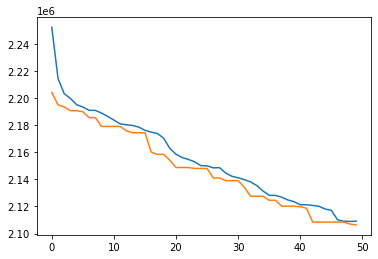

In [17]:
plt.plot(range(len(avg)), avg)
plt.plot(range(len(minimum)), minimum)

In [18]:
def generate_smart_individual(df, individual):
    df_copy = df.copy()

    smart_positions = []

    positions = random.sample(range(0,size), 2)
    pos1 = min(positions[0], positions[1])   #random.randint(0, 9)
    pos2 = max(positions[0], positions[1])   #random.randint(0, 9)

    pos = [pos1, pos2]
    segm = individual[pos1, pos2]
    
    seg_size = pos2-pos1 + 1
    k = 10 
    for i in range(size-1):
        smart_positions.append(individual[pos1])

    # choose 3 near neighbors based on distance
        choose_nn = list(df_copy[start].sort_values().index)[1:k]
    # randomly choose one among 3
        next_stop = random.choice(choose_nn)
    # delete the row that was the start
        df_copy = df_copy.drop(start)
        start = next_stop # now setting the start as next stop

# add index of last number
    smart_positions.append(int(df_copy.reset_index()["index"]))
    return smart_positions